<a href="https://colab.research.google.com/github/pranitha2144/Internship-iith/blob/Resnet/first_of_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Model
from keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [2]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/data-liverd/train",target_size=(224,224),class_mode='categorical'
)
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/data-liverd/val", target_size=(224,224),class_mode='categorical',shuffle=False)

Found 800 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [3]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights=None,include_top=True)

In [4]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#execute this cell 3 times
vggmodel.layers.pop()

In [7]:
for layers in (vggmodel.layers)[:14]:
    print(layers)
    layers.trainable = False

In [8]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
from tensorflow.keras import regularizers
X= vggmodel.layers[-2].output
#fc_1=Dense(4096,activation='relu')(X)
dr_1=Dropout(0.3)(X)
dr_2=Dropout(0.8)(dr_1)
dr_3=Dropout(0.99)(dr_2)
'''fc_2=Dense(4096, activation='relu')(dr_1)
dr_2=Dropout(0.1)(fc_2)
fc_3=Dense(4096,activation='relu')(dr_2)
dr_3=Dropout(0.2)(fc_3)
fc_4=Dense(4096,activation='relu')(dr_3)
dr_4=Dropout(0.2)(fc_4)'''
predictions = Dense(4, activation="softmax")(dr_2)
model_final = Model(input = vggmodel.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [10]:
model_final.load_weights("/content/drive/My Drive/Best models/model_x_1.h5")

In [11]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
Y_pred = model_final.predict_generator(testdata)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))
print('Classification Report')
target_names = ['grade0', 'grade1', 'grade2','grade3']
print(classification_report(testdata.classes, y_pred, target_names=target_names))

In [12]:
model_final.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.SGD(lr=0.0001), metrics=["accuracy"])

In [13]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/My Drive/Best models/model_b_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
hist=model_final.fit_generator(traindata, steps_per_epoch=2,epochs= 10, validation_data= testdata,validation_steps=1, callbacks=[checkpoint,early])

Epoch 1/10
2/2 [==============================] - 58s 29s/step - loss: 0.0431 - accuracy: 0.9844 - val_loss: 0.1984 - val_accuracy: 0.9688

Epoch 00001: val_accuracy improved from -inf to 0.96875, saving model to /content/drive/My Drive/Best models/model_b_1.h5


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/10
2/2 [==============================] - 58s 29s/step - loss: 0.1039 - accuracy: 0.9531 - val_loss: 1.2343 - val_accuracy: 0.7812

Epoch 00002: val_accuracy did not improve from 0.96875
Epoch 3/10
2/2 [==============================] - 55s 28s/step - loss: 0.1306 - accuracy: 0.9531 - val_loss: 0.6838 - val_accuracy: 0.7500

Epoch 00003: val_accuracy did not improve from 0.96875
Epoch 4/10
2/2 [==============================] - 56s 28s/step - loss: 0.3847 - accuracy: 0.8906 - val_loss: 0.4751 - val_accuracy: 0.9375

Epoch 00004: val_accuracy did not improve from 0.96875
Epoch 5/10
2/2 [==============================] - 56s 28s/step - loss: 0.1573 - accuracy: 0.9688 - val_loss: 0.0162 - val_accuracy: 1.0000

Epoch 00005: val_accuracy improved from 0.96875 to 1.00000, saving model to /content/drive/My Drive/Best models/model_b_1.h5
Epoch 6/10
2/2 [==============================] - 58s 29s/step - loss: 0.3582 - accuracy: 0.9531 - val_loss: 0.7824 - val_accuracy: 0.9062

Epoch 0000

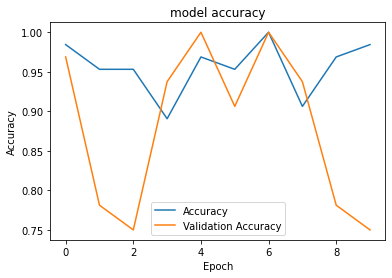

In [15]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

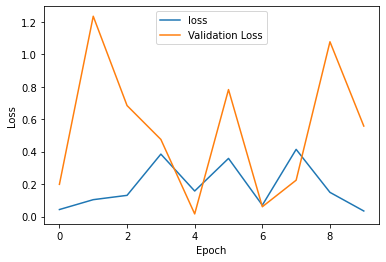

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [ ]:
model_final.save("/content/drive/My Drive/Best models/model1_1.h5")

In [17]:
model_cnn=keras.models.load_model("/content/drive/My Drive/Best models/model_b_1.h5")

In [18]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
Y_pred = model_cnn.predict_generator(testdata)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))
print('Classification Report')
target_names = ['grade0', 'grade1', 'grade2','grade3']
print(classification_report(testdata.classes, y_pred, target_names=target_names))

Confusion Matrix
[[48  2  0  0]
 [ 4 35  3  8]
 [ 1  0 49  0]
 [ 1  1  1 47]]
Classification Report
              precision    recall  f1-score   support

      grade0       0.89      0.96      0.92        50
      grade1       0.92      0.70      0.80        50
      grade2       0.92      0.98      0.95        50
      grade3       0.85      0.94      0.90        50

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200



In [19]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
Y_pred = model_final.predict_generator(testdata)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))
print('Classification Report')
target_names = ['grade0', 'grade1', 'grade2','grade3']
print(classification_report(testdata.classes, y_pred, target_names=target_names))

Confusion Matrix
[[48  2  0  0]
 [ 4 34  3  9]
 [ 1  0 49  0]
 [ 1  1  1 47]]
Classification Report
              precision    recall  f1-score   support

      grade0       0.89      0.96      0.92        50
      grade1       0.92      0.68      0.78        50
      grade2       0.92      0.98      0.95        50
      grade3       0.84      0.94      0.89        50

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

test_datagen = ImageDataGenerator()

In [ ]:
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/data-liverd/val',
                                                        target_size=(224, 224),shuffle=False)

Found 200 images belonging to 4 classes.


In [ ]:
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model_cnn.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
#target_names = ['grade1', 'grade0', 'grade2','grade3']
print(classification_report(validation_generator.classes, y_pred))

Confusion Matrix
[[49  1  0  0]
 [ 5 32  3 10]
 [ 1  0 49  0]
 [ 1  1  1 47]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        50
           1       0.94      0.64      0.76        50
           2       0.92      0.98      0.95        50
           3       0.82      0.94      0.88        50

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



In [ ]:
import os
import numpy as np
actual=[]
predicted=[]
data_path='/content/drive/My Drive/data-liverd/val'
data_dir_list=os.listdir(data_path)
for dataset in data_dir_list:
  print(dataset)
  img_list=os.listdir(data_path+'/'+dataset)
  correctCount=0
  wrongCount=0
  for img in img_list:
    img_path=data_path+'/'+dataset+'/'+img
    input_image = image.load_img(img_path,target_size=(224,224))
    input_image = np.asarray(input_image)
    input_image = np.expand_dims(input_image, axis=0)
    output = model_cnn.predict(input_image)
    ans='grade'+str(np.argmax(output[0],axis=0))
    if( ans in img):
      correctCount+=1
    else:
      wrongCount+=1
    actual.append(img[:6])
    predicted.append(ans)
  print("correct Count {} WrongCount {}".format(correctCount,wrongCount))

grade1
correct Count 32 WrongCount 18
grade0
correct Count 49 WrongCount 1
grade2
correct Count 49 WrongCount 1
grade3
correct Count 47 WrongCount 3


In [ ]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(actual, predicted) 

print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted)) 


Confusion Matrix :
[[49  1  0  0]
 [ 5 32  3 10]
 [ 1  0 49  0]
 [ 1  1  1 47]]
Accuracy Score : 0.885
Report : 
              precision    recall  f1-score   support

      grade0       0.88      0.98      0.92        50
      grade1       0.94      0.64      0.76        50
      grade2       0.92      0.98      0.95        50
      grade3       0.82      0.94      0.88        50

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



In [ ]:
import os
import numpy as np
actual=[]
predicted=[]
data_path='/content/drive/My Drive/data-liverd/val'
data_dir_list=os.listdir(data_path)
for dataset in data_dir_list:
  print(dataset)
  img_list=os.listdir(data_path+'/'+dataset)
  correctCount=0
  wrongCount=0
  for img in img_list:
    img_path=data_path+'/'+dataset+'/'+img
    input_image = image.load_img(img_path,target_size=(224,224))
    input_image = np.asarray(input_image)
    input_image = np.expand_dims(input_image, axis=0)
    output = model_final.predict(input_image)
    ans='grade'+str(np.argmax(output[0],axis=0))
    if( ans in img):
      correctCount+=1
    else:
      wrongCount+=1
    actual.append(img[:6])
    predicted.append(ans)
  print("correct Count {} WrongCount {}".format(correctCount,wrongCount))

grade1
correct Count 17 WrongCount 33
grade0
correct Count 48 WrongCount 2
grade2
correct Count 47 WrongCount 3
grade3
correct Count 42 WrongCount 8


In [ ]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(actual, predicted) 

print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted)) 


Confusion Matrix :
[[48  2  0  0]
 [11 17  4 18]
 [ 1  0 47  2]
 [ 0  7  1 42]]
Accuracy Score : 0.77
Report : 
              precision    recall  f1-score   support

      grade0       0.80      0.96      0.87        50
      grade1       0.65      0.34      0.45        50
      grade2       0.90      0.94      0.92        50
      grade3       0.68      0.84      0.75        50

    accuracy                           0.77       200
   macro avg       0.76      0.77      0.75       200
weighted avg       0.76      0.77      0.75       200



In [ ]:
tr_loss,tr_acc=model_cnn.evaluate(testdata)
tr_acc

7/7 [==============================] - 103s 15s/step


0.7850000262260437

In [ ]:
tr_loss,tr_acc=model_final.evaluate(traindata)
tr_acc

25/25 [==============================] - 407s 16s/step


0.8199999928474426

In [ ]:
tr_loss,tr_acc=model_cnn.evaluate(testdata)
tr_acc

NameError: ignored

In [ ]:
saved_model=keras.models.load_model("/content/drive/My Drive/Best models/model_n_1.h5")

In [ ]:
tr_loss,tr_acc=model_cnn.evaluate(validation_generator)
tr_acc

7/7 [==============================] - 93s 13s/step


0.8849999904632568

In [ ]:
tr_loss,tr_acc=saved_model.evaluate(testdata)
tr_acc

7/7 [==============================] - 103s 15s/step


0.7850000262260437

In [ ]:
model_final=keras.models.load_model("/content/drive/My Drive/Best models/model_f_1.h5")

OSError: ignored